In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from matplotlib import pyplot as plt

from utils import functions as fxs

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
ctype = 'skcm' #cancertype ID

# call functions to plot figures
cls = fxs.analysis()
# set plot parameters
fxs.plotParam() 

# read mutation rate results
cls.read_TFBS_MutRate(ctype, "tfbs-proximal" ) #per TFBS and  all TFBS combined (aka. allTFs)
cls.read_TFBS_MutRate_perSample(ctype, "tfbs-perSample") # allTFs results sep. by samples
cls.read_TFBS_MutRate_perMutType(ctype) # allTFs results sep. by mutation type 
cls.read_additionalFiles() # files related to enrichment analysis

<h3>Figure 1A - Mutation rate at TFBS in melanoma</h3>

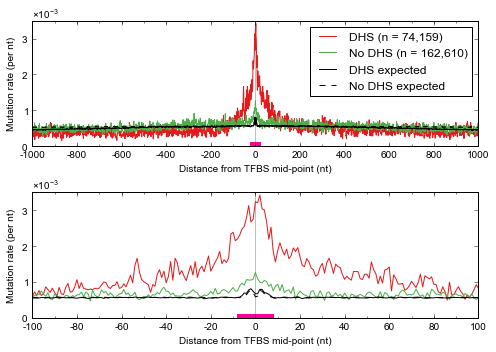

In [6]:
flanks=[1000, 100] # set x-axis limit for the flanks
legends={1000:1, 100:0} # show legend for only flank 1000

# define figure parameters
NROW = len(flanks)
NCOL = 1
fig = plt.figure(figsize=(7, 5))

axs=[]
for item in range(0, len(flanks)):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 0)))

count=0
for flk in flanks:
    cls.plot_TFBS_MutRate(axs[count], ctype, flk, 'allTFs', legends[flk])
    count+=1

plt.tight_layout(h_pad=0.5)
plt.show()

<h3> Figure 1B - per TF analysis </h3>

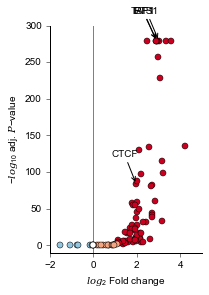

In [7]:
NROW = 1 
NCOL = 1

fig = plt.figure(figsize=(3, 4))
axs=[]
axs.append(plt.subplot2grid((NROW, NCOL), (0, 0)))

# per TF mutate rate plot for selected TFs
selected = [ 'CTCF', 'ETS1', 'IRF1', 'TAF1' ]

# enrichment plot
count=0
cls.plot_EnrichmentAnalysis(axs[count], cls.perTF_enrichment, ctype, selected)
count += 1

plt.tight_layout()
plt.show()

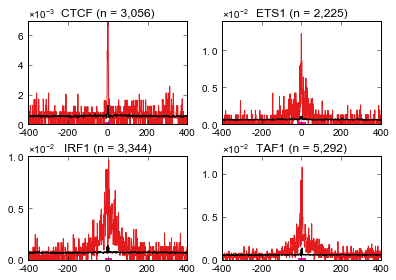

In [8]:
NROW = 2 
NCOL = 3

fig = plt.figure(figsize=(8, 4))
axs=[]
for item in range(0, NROW):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 1)))
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 2)))

# per TF mutate rate plot for selected TFs
selec_tfLists = [ 'CTCF', 'ETS1', 'IRF1', 'TAF1' ]

count=0
for tf in selec_tfLists:
    cls.plot_TFBS_MutRate(axs[count], ctype, 400, tf, 0)
    count =  count + 1

plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

<h3>Figure 1C - per Sample analysis</h3>

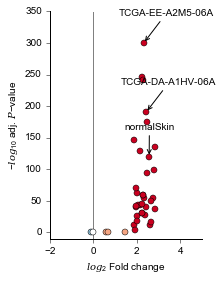

In [9]:
# define plot area
NROW = 1 
NCOL = 1

fig = plt.figure(figsize=(3, 4))

axs=[]
axs.append(plt.subplot2grid((NROW, NCOL), (0, 0)))

count=0

sampleIDs = [ 'TCGA-EE-A2M5-06A', 'TCGA-DA-A1HV-06A', 'normalSkin' ]

# Enrichment plot
cls.plot_EnrichmentAnalysis(axs[count], cls.perSample_enrichment, ctype, sampleIDs)
count += 1

plt.tight_layout()
plt.show()

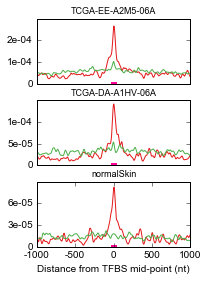

In [10]:
# define plot area
NROW = 3 
NCOL = 1

fig = plt.figure(figsize=(3, 4))

axs=[]

for item in range(0, NROW):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 0)))

count=0

for sample in sampleIDs:
    cls.plot_TFBS_MutRate_perSample(axs[count], sample, count)
    count =  count + 1

plt.tight_layout(h_pad=0.05)
plt.show()

<h3> Figure 1D per mutation type rate </h3>

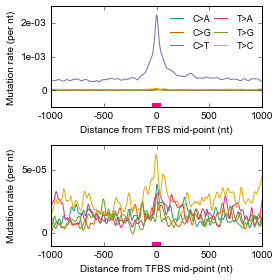

In [11]:
fig = plt.figure(figsize=(4, 4))

NROW = 2
NCOL = 1

axs=[]
for item in range(0, NROW):
    axs.append(plt.subplot2grid((NROW, NCOL), (item, 0)))
    
count=0
cls.plot_TFBS_MutRate_perMutType(axs[count], "", ctype, [ 'CA' , 'CG', 'CT', 'TA', 'TG', 'TC' ], count)
count+=1
cls.plot_TFBS_MutRate_perMutType(axs[count], "", ctype, [ 'CA' , 'CG', 'TA', 'TG', 'TC' ], count)

plt.tight_layout()
plt.show()